<a href="https://colab.research.google.com/github/goeckslab/MarkerIntensityPredictor/blob/dev/KNN_Phenotype_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook the check the cell neighbor phenotypes

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [94]:
combined_imputed_data = pd.read_csv("Jupyter/data/combined_imputed_data.csv")
combined_imputed_data

print(combined_imputed_data[combined_imputed_data["Origin"] == "spatial 6"] )

         ERK1_1     RAD51    Cyc_D1  Vimentin      aSMA  E_cadherin  ER_alpha  \
19755 -3.595558 -4.441481 -2.932810 -1.661854 -1.625706   -1.500650 -2.434179   
19756 -2.803968 -3.383218 -2.988966 -1.729636 -1.340509   -2.119797 -2.348963   
19757 -3.161604 -4.475153 -2.257401 -1.034395 -1.960561   -1.368477 -3.042755   
19758 -3.591288 -3.872666 -3.080454 -1.836691 -2.359495   -1.533035 -2.482795   
19759 -0.629833 -0.720404 -2.518162 -0.755346 -1.051943   -1.380304 -2.030915   
...         ...       ...       ...       ...       ...         ...       ...   
39505 -0.800093 -0.676295 -1.774016  0.276133 -1.236738   -0.178042 -0.840656   
39506 -3.221611 -3.522214 -2.952610 -1.127199 -2.324005   -2.107178 -2.667511   
39507 -3.344467 -3.660041 -2.735941 -1.113190 -1.336823   -1.357723 -2.086668   
39508 -3.207266 -3.375565 -2.709939 -1.214932 -2.287660   -1.378052 -2.183403   
39509 -3.628879 -3.782892 -3.059171 -1.758107 -2.370210   -1.526886 -2.423757   

             PR      EGFR  

In [69]:
# Load nearest neighbor indices

In [70]:
combined_nn = pd.read_csv('Jupyter/data/combined_nearest_neighbors.csv')
max_neighbor_count = combined_nn["Origin"].max().split(' ')[-1]
no_spatial_ni = combined_nn[combined_nn["Origin"] == f"no_spatial {max_neighbor_count}"].copy()
no_spatial_ni.rename(columns={"0":"Base Cell"}, inplace=True)

spatial_ni = combined_nn[combined_nn["Origin"] == f"spatial {max_neighbor_count}"].copy().reset_index(drop=True)
spatial_ni.rename(columns={"0":"Base Cell"}, inplace=True)
print(no_spatial_ni)
print(spatial_ni)


       Base Cell      1      2      3      4      5      6        Origin
0              0  17183   1245  18023   2655   2907    971  no_spatial 6
1              1    582    947   2580   1152  15531   1017  no_spatial 6
2              2   5619   1207   1703   2608   1943   5866  no_spatial 6
3              3   2168      2   2375   1195   2892  15527  no_spatial 6
4              4  17982   3518   1165   1048  17579  16858  no_spatial 6
...          ...    ...    ...    ...    ...    ...    ...           ...
19750      19750  18866  19643  19113  19746  18633  14959  no_spatial 6
19751      19751  17183   1043   1028  15527    738   1179  no_spatial 6
19752      19752   3105    870   2753   2216  15507    569  no_spatial 6
19753      19753  17980  18076  15833     14  18139  18089  no_spatial 6
19754      19754  17289     11      7   1143   2265   2625  no_spatial 6

[19755 rows x 8 columns]
       Base Cell      1      2      3      4      5      6     Origin
0              0      6     

In [71]:
# Load biopsy data and evaluate the data

In [81]:
data = pd.read_csv("Jupyter/data/HTA9-3_Bx2_HMS_Tumor_quant.csv")
data.head()

,CellID,DAPI_1_cellMasks,AF488_cellMasks,AF555_cellMasks,AF647_cellMasks,DAPI_2_cellMasks,ERK1_1_cellMasks,ERK1_2_cellMasks,RAD51_cellMasks,DAPI_3_cellMasks,...,CK19_nucleiMasks,p21_nucleiMasks,DAPI_7_nucleiMasks,CK14_nucleiMasks,AR_nucleiMasks,cPARP_nucleiMasks,DAPI_8_nucleiMasks,CK17_nucleiMasks,CK7_nucleiMasks,HER2_nucleiMasks
0,1,12289.690909,7578.890909,3135.118182,6038.500000,110.963636,1029.436364,752.963636,826.436364,213.736364,...,20.563636,534.709091,201.381818,2253.190909,661.409091,2569.445455,131.918182,2344.100000,195.027273,2545.036364
1,2,18933.310345,6629.344828,2719.758621,2848.379310,595.017241,1127.586207,811.051724,1028.293103,223.465517,...,20.155172,529.844828,237.775862,2246.758621,673.258621,2556.172414,134.775862,2350.275862,191.275862,2534.000000
2,3,6982.408537,9323.292683,3708.823171,7986.993902,254.969512,1253.890244,832.219512,1038.567073,823.884146,...,21.481707,531.091463,373.128049,2325.189024,711.774390,2603.378049,192.445122,2427.365854,197.262195,2579.146341
3,4,9747.527273,7144.781818,3024.884848,3112.278788,136.121212,1031.436364,752.454545,830.448485,41.630303,...,20.181818,534.484848,203.000000,2249.503030,673.290909,2570.866667,135.012121,2347.454545,191.769697,2544.830303
4,5,20233.730290,9413.634855,3651.556017,3742.597510,4622.315353,3962.925311,2245.331950,3805.331950,779.892116,...,20.269710,530.987552,216.008299,2261.551867,670.419087,2570.236515,196.033195,2383.626556,197.041494,2545.655602


In [82]:
print(f"Cell count: {data.shape[0]}")

Cell count: 19755


In [83]:
# Load replaced test data

In [84]:
replaced_test_data = pd.read_csv("Jupyter/data/replaced_test_data.csv")
replaced_test_data.head()

,ERK1_1,RAD51,Cyc_D1,Vimentin,aSMA,E_cadherin,ER_alpha,PR,EGFR,Rb,...,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,X_centroid,Y_centroid
0,-3.595558,0.000000,0.000000,-1.661854,-1.625706,-1.500650,-2.434179,-1.776954,-1.788399,-1.475500,...,-0.526824,0.000000,0.000000,0.000000,1.225162,0.030532,-2.372059,0.204272,-0.154933,-5.0
1,0.000000,0.000000,-2.988966,-1.729636,-1.340509,0.000000,-2.348963,-1.720696,-1.774023,0.000000,...,-0.519127,-0.359316,-0.377944,-0.812858,-0.644365,-0.872131,0.000000,-0.108674,-0.152033,-5.0
2,-3.161604,0.000000,-2.257401,0.000000,-1.960561,-1.368477,0.000000,-1.359667,-1.379818,-1.181703,...,0.000000,-0.094802,-0.192820,1.393328,1.587158,1.421882,-2.289367,-1.642430,-0.155382,-5.0
3,-3.591288,-3.872666,-3.080454,-1.836691,-2.359495,-1.533035,-2.482795,-1.800042,0.000000,-1.513882,...,0.000000,-0.337184,-0.333235,1.406231,1.948322,0.654407,-2.476722,-1.645661,-0.144972,-5.0
4,-0.629833,-0.720404,-2.518162,0.000000,0.000000,0.000000,-2.030915,0.000000,-1.201466,-1.015339,...,0.000000,-0.104410,-0.329835,2.210347,1.456916,2.430535,0.028167,-0.354902,-0.150785,-5.0


In [85]:
from sklearn.metrics import nan_euclidean_distances
distances = pd.DataFrame(nan_euclidean_distances(replaced_test_data,replaced_test_data, missing_values=0))
distances

,0,1,2,3,4,5,6,7,8,9,...,19745,19746,19747,19748,19749,19750,19751,19752,19753,19754
0,0.000000,2.604551,3.144780e+00,2.799639,5.852001,5.136967,2.281844,4.597789,4.888826,3.802304,...,14.227010,11.119104,12.519895,12.146070,11.040551,11.101862,10.297650,9.620023,9.594478,10.789764
1,2.604551,0.000000,5.344791e+00,5.260919,6.170576,1.780811,1.655737,0.973392,2.107125,5.119199,...,12.970767,9.971602,12.234039,11.179761,10.070700,10.391364,10.361353,9.458713,9.293476,9.472228
2,3.144780,5.344791,1.867651e-07,1.847043,4.698546,5.968951,3.454911,6.476886,6.577906,3.517343,...,13.505905,10.626532,12.577122,11.889550,10.950486,11.460487,10.251396,9.486388,10.660408,11.230564
3,2.799639,5.260919,1.847043e+00,0.000000,6.875578,6.290205,3.813529,6.407802,6.670802,3.816097,...,14.728039,12.513590,14.128227,12.877961,12.750706,12.271150,10.606009,9.841271,10.475852,10.608612
4,5.852001,6.170576,4.698546e+00,6.875578,0.000000,7.548367,5.428505,7.021789,7.765877,4.445891,...,12.519844,10.131067,12.176119,11.505539,10.100397,11.417503,10.942884,10.111248,12.142307,11.835364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19750,11.101862,10.391364,1.146049e+01,12.271150,11.417503,11.313477,11.004007,11.097029,11.830092,11.531856,...,5.045352,2.111627,4.097700,2.539642,2.586635,0.000000,7.056300,6.189199,7.117304,8.340788
19751,10.297650,10.361353,1.025140e+01,10.606009,10.942884,9.923648,9.826509,10.474933,10.084460,10.219780,...,9.432244,7.064363,8.958107,7.812271,6.952940,7.056300,0.000000,3.440814,6.040595,4.532405
19752,9.620023,9.458713,9.486388e+00,9.841271,10.111248,9.578105,9.194875,9.629792,9.498389,9.658464,...,9.265526,5.952014,8.968052,6.432772,6.212410,6.189199,3.440814,0.000000,3.198130,3.790524
19753,9.594478,9.293476,1.066041e+01,10.475852,12.142307,10.242623,9.572821,10.192559,10.415249,10.613888,...,10.368471,6.681032,9.798288,7.666502,7.204940,7.117304,6.040595,3.198130,0.000000,4.807001


In [86]:
# Load mapped phenotypes per neighbor

In [87]:
phenotypes = pd.read_csv("Jupyter/data/combined_mapped_phenotypes.csv")

# shift column Base cell to first position in df 
first_column = phenotypes.pop('Base Cell')
phenotypes.insert(0, 'Base Cell', first_column)
phenotypes


,Base Cell,1,2,3,4,5,6,Origin
0,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
1,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
2,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
3,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
4,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
...,...,...,...,...,...,...,...,...
39505,Basal,Basal,Basal,Basal,Basal,Basal,Basal,spatial 6
39506,Basal,Basal,Basal,Basal,Basal,Basal,Basal,spatial 6
39507,Basal,Basal,Basal,Basal,Basal,Basal,Basal,spatial 6
39508,Basal,Basal,Basal,Basal,Basal,Basal,Basal,spatial 6


In [88]:
# Add phenotype to biopsy data

In [89]:
data["Phenotype"] = phenotypes["Base Cell"]

## Display phenotypes in biopsy

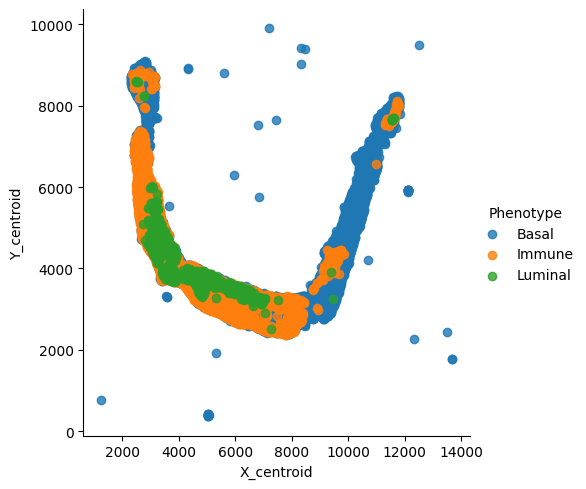

In [90]:
sns.lmplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype', fit_reg=False)

# Specify cell index to select all neighbors and investigate the neighbor hood

## Select no spatial neighbors

In [104]:
cell_index_to_evaluate = 2500

n_sp_neighbor_indices = no_spatial_ni[no_spatial_ni["Base Cell"] == cell_index_to_evaluate].copy()
n_sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

n_sp_neighbor_indices.drop(n_sp_neighbor_indices.columns[len(n_sp_neighbor_indices.columns)-1], axis=1, inplace=True)
n_sp_phenotype_indices.drop(n_sp_phenotype_indices.columns[len(n_sp_phenotype_indices.columns)-1], axis=1, inplace=True)



print(n_sp_phenotype_indices)
print(n_sp_neighbor_indices)

     Base Cell       1      2       3       4      5       6
2500     Basal  Immune  Basal  Immune  Immune  Basal  Immune
      Base Cell     1     2     3     4     5     6
2500       2500  4221  3224  6457  6844  7812  8077


In [116]:
n_sp_cells = data.loc[n_sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
n_sp_cells["Phenotype"] = phenotypes["Base Cell"]
n_sp_origin = pd.DataFrame(n_sp_cells.loc[[cell_index_to_evaluate]])
n_sp_neighbors = n_sp_cells[1:]

Show nearest neighbor for given cell

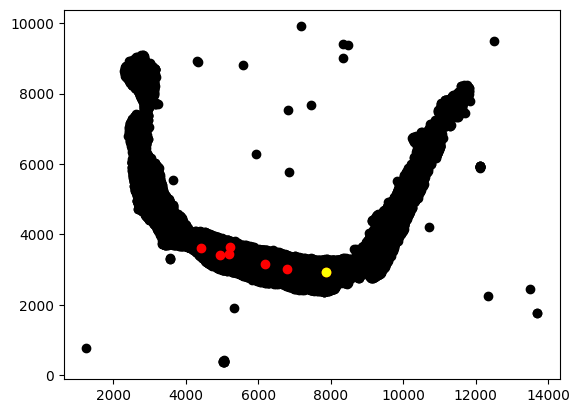

In [101]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(n_sp_cells["X_centroid"], n_sp_cells["Y_centroid"] , color="red")
plt.scatter(n_sp_origin["X_centroid"], n_sp_origin["Y_centroid"] , color="yellow")


## Select spatial neighbors

In [107]:
sp_neighbor_indices = spatial_ni[spatial_ni["Base Cell"] == cell_index_to_evaluate].copy()
sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

sp_neighbor_indices.drop(sp_neighbor_indices.columns[len(sp_neighbor_indices.columns)-1], axis=1, inplace=True)
sp_phenotype_indices.drop(sp_phenotype_indices.columns[len(sp_phenotype_indices.columns)-1], axis=1, inplace=True)

print(sp_phenotype_indices)
print(sp_neighbor_indices)

     Base Cell       1      2       3       4      5       6
2500     Basal  Immune  Basal  Immune  Immune  Basal  Immune
      Base Cell     1     2     3     4     5     6
2500       2500  3224  3253  3331  3595  3824  3734


In [115]:
sp_cells = data.loc[sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
sp_cells["Phenotype"] = phenotypes["Base Cell"]
sp_cells
sp_origin = pd.DataFrame(sp_cells.loc[[cell_index_to_evaluate]])
sp_neighbors = sp_cells[1:]

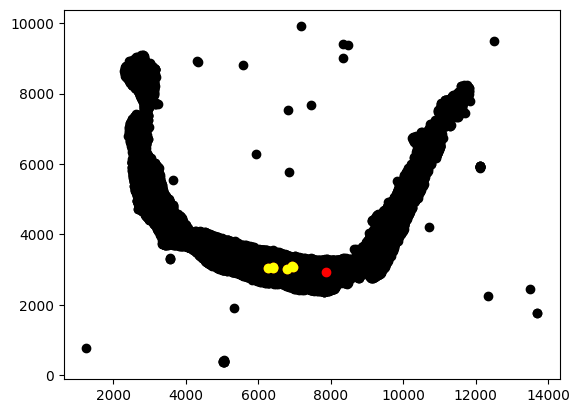

In [110]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(sp_cells["X_centroid"], sp_cells["Y_centroid"] , color="red")
plt.scatter(sp_neighbors["X_centroid"], sp_neighbors["Y_centroid"] , color="yellow")

# Compare spatial and non spatial neighbors


Plot shows where the neighbors are located for the given cell, when including spatial information and without spatial information

Text(0.5, 1.0, 'Origin and Neighbors not including Spatial Information')

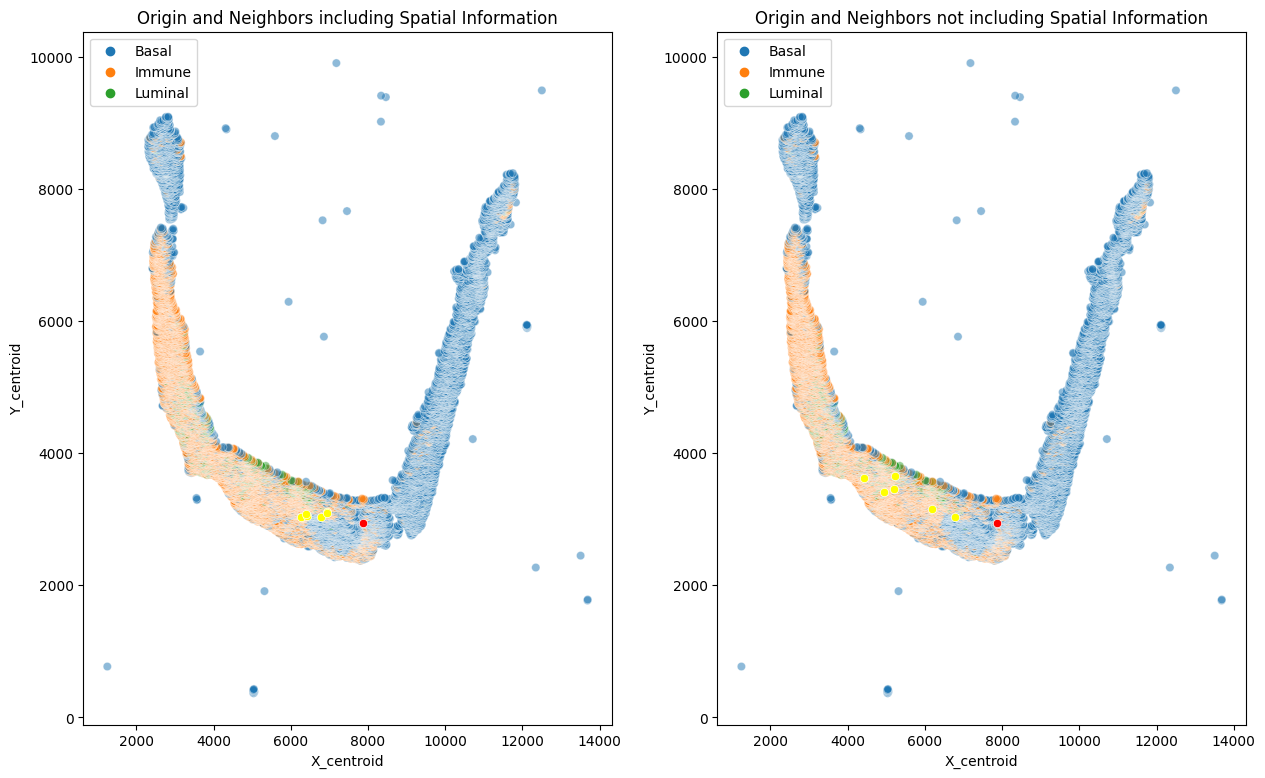

In [112]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,9))

sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax1, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_neighbors, ax=ax1, color="yellow")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_origin, ax=ax1, color="red")
ax1.set_title("Origin and Neighbors including Spatial Information")


sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax2, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_neighbors, ax=ax2, color="yellow")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_origin, ax=ax2, color="red")
ax2.set_title("Origin and Neighbors not including Spatial Information")

# R2 Significance


Based on this thread
https://www.researchgate.net/post/Comparing_R-squared_values_in_two_models_any_help

and and answer by Ghassan Okour, 
R2 significance is calculated like the following:





```
Firstly; calculate the root square of both squared R.
Secondly; transform the values of the root square of both squared R into Fisher values.
Thirdly; use the formula Z=[z1-z2]/sqrt[(1/(n1-3))+(1/(n2-3))].
Fourthly; use the formula Sig. =(1-NORM.S.DIST(ABS(Z),TRUE))*2.
```



In [113]:
# z function

def calculate_z(input1, input2):
  print(input1)
  print(input2)


In [114]:
no_spatial_r2_scores_2 = pd.read_csv("no_spatial_imputed_r2_score_2.csv")
no_spatial_r2_scores_3 = pd.read_csv("no_spatial_imputed_r2_score_3.csv")

no_spatial_r2_scores_2.rename(columns={"Score": "2 Neighbor Score"}, inplace=True)
no_spatial_r2_scores_3.rename(columns={"Score": "3 Neighbor Score"}, inplace=True)

markers = no_spatial_r2_scores_2["Marker"]

combined = pd.concat([no_spatial_r2_scores_2, no_spatial_r2_scores_3], axis=1)
combined.drop(columns=["Marker"], inplace=True)
combined["Marker"] = markers

# Set negative values to 0
num = combined._get_numeric_data()
num[num < 0] = 0

combined['2 Neighbor Squareroot']=combined['2 Neighbor Score']**(1/2)
combined['3 Neighbor Squareroot']=combined['3 Neighbor Score']**(1/2)


combined["2 Neighbor Z"] = combined["2 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["3 Neighbor Z"] = combined["3 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["Z"] = (combined["2 Neighbor Z"] - combined["3 Neighbor Z"]) / np.sqrt(1 / (combined["2 Neighbor Z"].shape[0]-3) + (1/(combined["3 Neighbor Z"].shape[0]-3)))
combined["Significane"] = (1 - np.random.normal(np.absolute(combined["Z"]))) * 2
print(combined)

FileNotFoundError: [Errno 2] No such file or directory: 'no_spatial_imputed_r2_score_2.csv'